<a href="https://colab.research.google.com/github/TaskiyaMridha/Fake_news_Classification/blob/main/Fake__news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news Dectection using Classification Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Dataset Loading and Preview

This code loads a dataset of fake and real news articles from a CSV file (fake_and_real_news.csv) using **pandas**. It then shows the first few rows with **df.head()** to give a quick look at the data

In [ ]:
df=pd.read_csv('/content/fake_and_real_news.csv')
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


### Dataset Size Check

This code snippet, df.shape, shows the dimensions of the dataset (number of rows and columns). It helps us understand the dataset's size.

In [ ]:
df.shape

(9900, 2)

##Label Slicing

This code selects parts of the dataset:

X takes the first column (probably the news text).
Y takes the last column (likely the labels, like real or fake).

In [ ]:
X=df.iloc[:,0:1]
Y=df.iloc[:,-1]

This code creates a bar chart to show how many real and fake news articles are in the dataset. It counts the labels in Y and displays the result with labels for clarity

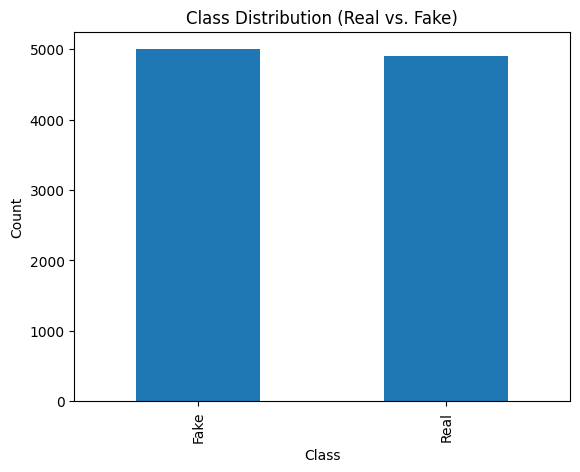

In [ ]:
import matplotlib.pyplot as plt

Y.value_counts().plot(kind='bar')
plt.title('Class Distribution (Real vs. Fake)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X

,Text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...
1,U.S. conservative leader optimistic of common ...
2,"Trump proposes U.S. tax overhaul, stirs concer..."
3,Court Forces Ohio To Allow Millions Of Illega...
4,Democrats say Trump agrees to work on immigrat...
...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...
9896,Trump consults Republican senators on Fed chie...
9897,Trump lawyers say judge lacks jurisdiction for...
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...


In [ ]:
Y

,label
0,Fake
1,Real
2,Real
3,Fake
4,Real
...,...
9895,Fake
9896,Real
9897,Real
9898,Fake


## Splitting Data for Training and Testing

This code splits the data into training and testing sets, with 80% for training and 20% for testing. The split is done randomly, but the **random_state=0** ensures consistent results each time.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Display a pie chart showing the percentage of data used for training and testing, helping you visualize the split.

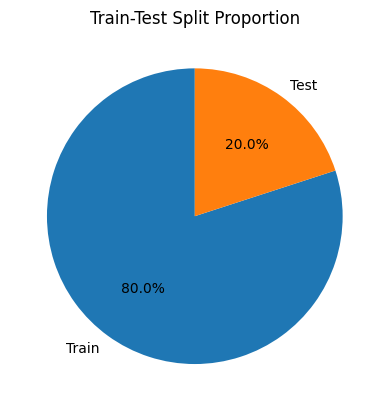

In [ ]:
import matplotlib.pyplot as plt

# Plot the proportion of training and testing data
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Train-Test Split Proportion')
plt.show()

In [ ]:
X_train

,Text
5281,"Trump says travel ban should be 'larger, tough..."
2929,WATCH This WWII Vet Shame Trump To Hell And B...
5167,Alec Baldwin Returns To SNL To Shower Trump W...
5255,Health Secretary Price's use of private jets u...
3078,BOMBSHELL REPORT: White House Counsel Prepari...
...,...
9225,Sean Spicer’s Twitter History Comes Back To B...
4859,Mattis says U.S. working to ensure situation a...
3264,Obama Admin Official Just Humiliated Trump By...
9845,Judge Who Blocked Trump’s Muslim Ban REPEATED...


In [ ]:
Y_train

,label
5281,Real
2929,Fake
5167,Fake
5255,Real
3078,Fake
...,...
9225,Fake
4859,Real
3264,Fake
9845,Fake


##Importing SVM and Classifier

imports two classification models:



*   LinearSVC is used for linear support vector classification.
*   SGDClassifier is used for classification with stochastic gradient descent.




In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

##TF-IDF Vectorizer Setup

**TF-IDF Vectorizer** that converts text into numerical features. It limits the features to the top 5000 most important words based on TF-IDF scores. It then transforms the test data using the same fitted vectorizer.

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer

TfidfVectorizer(max_features=5000)

In [ ]:
# Fit the vectorizer on the training data and transform both X_train and X_test
X_train_tfidf = vectorizer.fit_transform(X_train['Text'])
X_test_tfidf = vectorizer.transform(X_test['Text'])

###LinearSVC Classifier

initializes a LinearSVC model and trains it using the transformed training data (X_train_tfidf) and the labels (Y_train). The random state ensures consistent results.

In [ ]:
clf=LinearSVC(random_state=0)

In [ ]:

clf.fit(X_train_tfidf, Y_train)

LinearSVC(random_state=0)

### Making Predictions with Classifier

In [ ]:
Y_pred = clf.predict(X_test_tfidf)

### Evaluating Model Accuracy

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9984848484848485


The **confusion matrix** tells you how many predictions were correct or incorrect:
1. True Positive (TP): Correctly
 predicted "Real" articles.
2. True Negative (TN): Correctly predicted "Fake" articles.
3. False Positive (FP): Incorrectly predicted "Real" for a "Fake" article.
4. False Negative (FN): Incorrectly predicted "Fake" for a "Real" article.





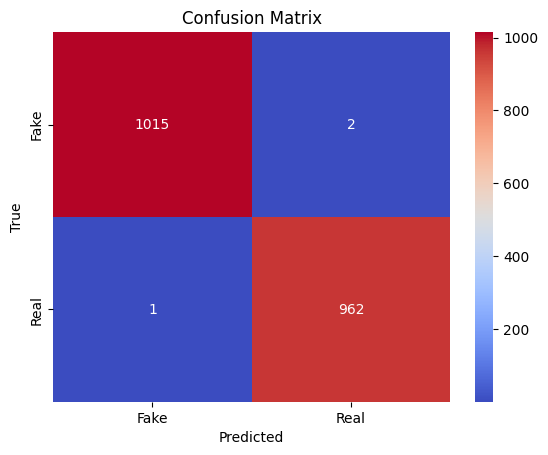

In [ ]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()